In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

Import pre-made dataset from previous minings

In [5]:
model = pd.read_csv('model_final.csv')

In [6]:
temp = pd.read_csv('low_fresh.csv')

Determining Column values

In [9]:
model['low_fresh']= ''

In [10]:
model.loc[model['SubjectID'].isin(low), 'low_fresh']=0

In [11]:
model.loc[~model['SubjectID'].isin(low), 'low_fresh']=1

In [12]:
model['low_fresh'].value_counts()

1    387210
0     13609
Name: low_fresh, dtype: int64

In [15]:
doubles = pd.read_csv('double.csv', names =['0','ids'])

In [16]:
double_list = doubles['ids']

In [17]:
len(double_list.unique())

20799

In [18]:
model['double major']=0

In [19]:
model.loc[model['SubjectID'].isin(double_list), 'double major']=1

In [21]:
model['double major'].value_counts()

1    400082
0       737
Name: double major, dtype: int64

In [22]:
model.head()

,SubjectID,Cumul GPA,Ps1 Timestat Code,Ps1 Ofcl Stat Flag,Ps1 Major1 Code,Ps1 Acad Standing Desc,Gender,Citizen Country Name,Degree Major1 Discipline Code,Classification,Min_GPA,Hardest Semester,major counts,low_fresh,double major
0,172846340,2.70,P,Y,PSC,PROBATION,F,USA,SOCS,4,3.30,0,1,1,1
1,175397669,2.33,F,N,PSC,ACTIVE,M,USA,NaN,1,1.13,2,3,1,1
2,175397669,2.33,F,Y,ECO,ACTIVE,M,USA,NaN,1,1.13,2,3,1,1
3,175397669,2.33,F,Y,ECO,PROBATION,M,USA,NaN,1,1.13,2,3,1,1
4,175397669,2.33,P,N,UNC,PROBATION,M,USA,NaN,1,1.13,2,3,1,1


In [69]:
model_test = model.drop_duplicates()

In [70]:
model_test.head()

,SubjectID,Cumul GPA,Ps1 Timestat Code,Ps1 Ofcl Stat Flag,Ps1 Major1 Code,Ps1 Acad Standing Desc,Gender,Citizen Country Name,Degree Major1 Discipline Code,Classification,Min_GPA,Hardest Semester,major counts,low_fresh,double major
0,172846340,2.70,P,Y,PSC,PROBATION,F,USA,SOCS,4,3.30,0,1,1,1
1,175397669,2.33,F,N,PSC,ACTIVE,M,USA,NaN,1,1.13,2,3,1,1
2,175397669,2.33,F,Y,ECO,ACTIVE,M,USA,NaN,1,1.13,2,3,1,1
3,175397669,2.33,F,Y,ECO,PROBATION,M,USA,NaN,1,1.13,2,3,1,1
4,175397669,2.33,P,N,UNC,PROBATION,M,USA,NaN,1,1.13,2,3,1,1


In [77]:
from tqdm import tqdm

Changing categorical values into frequency 

In [78]:
model['Timestat Code =F'] = ''
model['Timestat Code =P'] = ''
model['Timestat Code =X'] = ''
model['Probation term numbers']= ''

Using Multiprocessing 

In [81]:
import multiprocessing

num_processes = multiprocessing.cpu_count()
chunk_size = int(model.shape[0]/num_processes)
chunks = [model.loc[model.index[i:i + chunk_size]] for i in range(0, model.shape[0], chunk_size)]

In [90]:
def substitute(model):
    for i in tqdm(model['SubjectID'].unique()):
        model.loc[model['SubjectID']==i,'Timestat Code =F']=model.loc[model['SubjectID']==i]['Ps1 Timestat Code'].value_counts().to_dict().get('F')
        model.loc[model['SubjectID']==i,'Timestat Code =P']=model.loc[model['SubjectID']==i]['Ps1 Timestat Code'].value_counts().to_dict().get('P')
        model.loc[model['SubjectID']==i,'Timestat Code =X']=model.loc[model['SubjectID']==i]['Ps1 Timestat Code'].value_counts().to_dict().get('X')
        model.loc[model['SubjectID']==i,'Ps1 Acad Standing Desc']=model.loc[model['SubjectID']==i]['Ps1 Acad Standing Desc'].value_counts().to_dict().get('PROBATION')
    for i in tqdm(model['SubjectID'].unique()):
        model.loc[model['SubjectID']==i,'Probation term normalized']= model['Ps1 Acad Standing Desc']/((model['SubjectID']==i).sum())
    return model

In [75]:
def probation_counts(model):
    for i in tqdm(model['SubjectID'].unique()):
        model.loc[model['SubjectID']==i,'Probation term numbers']=model.loc[model['SubjectID']==i]['Ps1 Acad Standing Desc'].value_counts().to_dict().get('PROBATION')
    return model

In [76]:
def probation(df): 
    for i in df['SubjectID'].unique():
        df.loc[df['SubjectID']==i,'Probation term normalized']= df['Ps1 Acad Standing Desc']/((df['SubjectID']==i).sum())
    return df

In [ ]:
pool = multiprocessing.Pool(processes=num_processes)
result = pool.map(substitute, chunks)
results = pd.concat(result)

In [92]:
results.head()

,SubjectID,Cumul GPA,Ps1 Timestat Code,Ps1 Ofcl Stat Flag,Ps1 Major1 Code,Ps1 Acad Standing Desc,Gender,Citizen Country Name,Degree Major1 Discipline Code,Classification,Min_GPA,Hardest Semester,major counts,low_fresh,double major,Timestat Code =F,Timestat Code =P,Timestat Code =X,Probation term numbers,Probation term normalized
0,172846340,2.70,P,Y,PSC,1,F,USA,SOCS,4,3.30,0,1,1,1,None,1,None,,1
1,175397669,2.33,F,N,PSC,8,M,USA,NaN,1,1.13,2,3,1,1,12,4,8,,0.333333
2,175397669,2.33,F,Y,ECO,8,M,USA,NaN,1,1.13,2,3,1,1,12,4,8,,0.333333
3,175397669,2.33,F,Y,ECO,8,M,USA,NaN,1,1.13,2,3,1,1,12,4,8,,0.333333
4,175397669,2.33,P,N,UNC,8,M,USA,NaN,1,1.13,2,3,1,1,12,4,8,,0.333333


In [93]:
model= results

In [94]:
model_test = results.copy(deep= True)
model_test = model_test.drop(['Probation term numbers', 'Degree Major1 Discipline Code', 'Ps1 Ofcl Stat Flag'], axis =1)

In [95]:
model_test['Timestat Code =F']= model_test['Timestat Code =F'].fillna(0)
model_test['Timestat Code =P']= model_test['Timestat Code =P'].fillna(0)
model_test['Timestat Code =X']= model_test['Timestat Code =X'].fillna(0)
model_test['Probation term normalized']=model_test['Probation term normalized'].fillna(0)

In [96]:
model_test.head()

,SubjectID,Cumul GPA,Ps1 Timestat Code,Ps1 Major1 Code,Ps1 Acad Standing Desc,Gender,Citizen Country Name,Classification,Min_GPA,Hardest Semester,major counts,low_fresh,double major,Timestat Code =F,Timestat Code =P,Timestat Code =X,Probation term normalized
0,172846340,2.70,P,PSC,1,F,USA,4,3.30,0,1,1,1,0,1,0,1.000000
1,175397669,2.33,F,PSC,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333
2,175397669,2.33,F,ECO,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333
3,175397669,2.33,F,ECO,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333
4,175397669,2.33,P,UNC,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333


In [97]:
def last_gpa(df):
    for i in df['SubjectID'].unique():
        df.loc[df['SubjectID']==i, 'Cumul GPA']= df.loc[df['SubjectID']==i]['Cumul GPA'].iloc[-1]
    return df

In [98]:
chunk_test_size = int(model_test.shape[0]/8)

chunks_test = [model_test.loc[model_test.index[i:i + chunk_test_size]] for i in range(0, model_test.shape[0], chunk_size)]
pool = multiprocessing.Pool(processes=8)
result_gpa = pool.map(last_gpa, chunks_test)
result_gpa = pd.concat(result_gpa)
result_gpa.head()

,SubjectID,Cumul GPA,Ps1 Timestat Code,Ps1 Major1 Code,Ps1 Acad Standing Desc,Gender,Citizen Country Name,Classification,Min_GPA,Hardest Semester,major counts,low_fresh,double major,Timestat Code =F,Timestat Code =P,Timestat Code =X,Probation term normalized
0,172846340,2.70,P,PSC,1,F,USA,4,3.30,0,1,1,1,0,1,0,1.000000
1,175397669,2.07,F,PSC,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333
2,175397669,2.07,F,ECO,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333
3,175397669,2.07,F,ECO,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333
4,175397669,2.07,P,UNC,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333


Process ForkPoolWorker-34:
Process ForkPoolWorker-35:
Process ForkPoolWorker-40:
Process ForkPoolWorker-37:
Process ForkPoolWorker-33:
Process ForkPoolWorker-36:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jaeheuk/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jaeheuk/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/jaeheuk/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jaeheuk/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/jaeheuk/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/jaeheuk/anaconda3/lib/python3.7/multiprocessing/process.

In [99]:
model_test = result_gpa

In [100]:
model_test

,SubjectID,Cumul GPA,Ps1 Timestat Code,Ps1 Major1 Code,Ps1 Acad Standing Desc,Gender,Citizen Country Name,Classification,Min_GPA,Hardest Semester,major counts,low_fresh,double major,Timestat Code =F,Timestat Code =P,Timestat Code =X,Probation term normalized
0,172846340,2.70,P,PSC,1,F,USA,4,3.30,0,1,1,1,0,1,0,1.000000
1,175397669,2.07,F,PSC,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333
2,175397669,2.07,F,ECO,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333
3,175397669,2.07,F,ECO,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333
4,175397669,2.07,P,UNC,8,M,USA,1,1.13,2,3,1,1,12,4,8,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400814,255137993,3.48,F,ME,None,M,HONG KONG,4,2.90,0,1,1,1,11,0,6,0.000000
400815,255137993,3.48,X,ME,None,M,HONG KONG,4,2.90,0,1,1,1,11,0,6,0.000000
400816,255137993,3.48,F,ME,None,M,HONG KONG,4,2.90,0,1,1,1,1,0,0,0.000000
400817,255461372,2.43,F,PHY,None,F,USA,1,0.70,1,1,1,1,2,0,0,0.000000


In [101]:
model_test= model_test.drop_duplicates()

In [102]:
model_test= model_test.drop(['Ps1 Timestat Code', 'Ps1 Acad Standing Desc'], axis =1 )

In [142]:
model_final = model_test.copy(deep=True)

In [143]:
model_final = model_final.drop_duplicates()

Custom Labeling

In [103]:
model_final_test = model_test.copy(deep =True)

In [104]:
model_final_test.loc[model_final_test['Citizen Country Name']!='USA', 'Citizen Country Name']=0
model_final_test.loc[model_final_test['Citizen Country Name']=='USA', 'Citizen Country Name']=1

In [296]:
model_final.loc[model['Citizen Country Name']=='USA', 'Citizen Country Name']=1
model_final.loc[model['Citizen Country Name']!='USA', 'Citizen Country Name']=0

Model_final and Model_final_test are different in terms of which columns to use. Model_final_test performs learning with less columns.

In [ ]:
model_final = model_final.rename(columns={"Ps1 Acad Standing Desc": "Academic Standing","Ps1 Timestat Code": "Timestat Code", "Ps1 Major1 Code": "Major", "Ps1 Ofcl Stat Flag":"Stat Flag","Min_GPA": "Lowest GPA", "Degree Major1 Discipline Code": "Major department", "major counts": "Number of majors", "low_fresh": "<1 GPA first semester", "double major": "Double Major"})

In [106]:
model_final_test = model_final_test.rename(columns={"Ps1 Acad Standing Desc": "Academic Standing","Ps1 Timestat Code": "Timestat Code", "Ps1 Major1 Code": "Major", "Ps1 Ofcl Stat Flag":"Stat Flag","Min_GPA": "Lowest GPA", "Degree Major1 Discipline Code": "Major department", "major counts": "Number of majors", "low_fresh": "<1 GPA first semester", "double major": "Double Major"})

In [299]:
model_final = pd.get_dummies(data = model_final, columns= ['Stat Flag','Major','Major department'],  dummy_na=True)

In [109]:
model_final_test = pd.get_dummies(data = model_final_test, columns= ['Major'],  dummy_na=True)

In [302]:
model_final = pd.get_dummies(data = model_final, columns= ['Gender'],  dummy_na=True)

In [110]:
model_final_test = pd.get_dummies(data = model_final_test, columns = ['Gender'], dummy_na=False)

In [304]:
model_final = model_final.drop_duplicates()

In [111]:
model_final_test = model_final_test.drop_duplicates()

In [112]:
model_final_test

,SubjectID,Cumul GPA,Citizen Country Name,Classification,Lowest GPA,Hardest Semester,Number of majors,<1 GPA first semester,Double Major,Timestat Code =F,...,Major_SA,Major_SOC,Major_SP,Major_STT,Major_TH,Major_UNC,Major_WS,Major_nan,Gender_F,Gender_M
0,172846340,2.70,1,4,3.30,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,175397669,2.07,1,1,1.13,2,3,1,1,12,...,0,0,0,0,0,0,0,0,0,1
2,175397669,2.07,1,1,1.13,2,3,1,1,12,...,0,0,0,0,0,0,0,0,0,1
4,175397669,2.07,1,1,1.13,2,3,1,1,12,...,0,0,0,0,0,1,0,0,0,1
25,175693463,3.02,1,4,2.65,3,2,1,1,12,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400703,254575592,2.79,0,4,1.35,5,3,1,1,56,...,0,0,0,0,0,0,0,0,1,0
400769,254613473,3.08,0,3,2.00,5,1,1,1,12,...,0,0,0,0,0,0,0,0,1,0
400799,255137993,3.48,0,4,2.90,0,1,1,1,11,...,0,0,0,0,0,0,0,0,0,1
400816,255137993,3.48,0,4,2.90,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


X, y are for model_final, and X_trial, y_trial are for model_final_test

In [316]:
X = model_final.drop(['Classification'], axis =1)
y = model_final['Classification']

In [113]:
X_trial =model_final_test.drop(['Classification'], axis =1)
y_trial =model_final_test['Classification']

In [317]:
y= pd.get_dummies(data = y, columns = ['Classification'])

In [115]:
y_trial= pd.get_dummies(data = y_trial, columns = ['Classification'])

In [462]:
for i in X.columns:
    X[i] = X[i]/X[i].max()

In [116]:
for i in X_trial.columns:
    X_trial[i] = X_trial[i]/X_trial[i].max()

In [ ]:
X = X.fillna(0)

In [118]:
X_trial= X_trial.fillna(0)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_trial,y_trial,test_size = .10)

In [120]:
X_train.isnull().sum()

SubjectID               0
Cumul GPA               0
Citizen Country Name    0
Lowest GPA              0
Hardest Semester        0
                       ..
Major_UNC               0
Major_WS                0
Major_nan               0
Gender_F                0
Gender_M                0
Length: 114, dtype: int64

In [143]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [144]:
classifier = Sequential()
classifier.add(Dense(activation= 'relu', input_dim = 114, units = 64, init = 'uniform'))
classifier.add(Dense(activation= 'relu', units = 64, init = 'uniform'))
classifier.add(Dense(activation= 'relu', units = 32, init = 'uniform'))
classifier.add(Dense(activation= 'relu', units = 16, init = 'uniform'))
classifier.add(Dense(activation= 'softmax', units = 4, init = 'uniform'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=114, units=64, kernel_initializer="uniform")`
  
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  """
/home/jaeheuk/anaconda3/lib/python3.7/site-pac

In [ ]:
history =classifier.fit(X_train, y_train, epochs = 500, batch_size = 2048)

In [126]:
print(max(history.history['accuracy']))

0.80473155


The graph and the outcome for the two models are on the report. This is graph for model_final_test

<function matplotlib.pyplot.show(*args, **kw)>

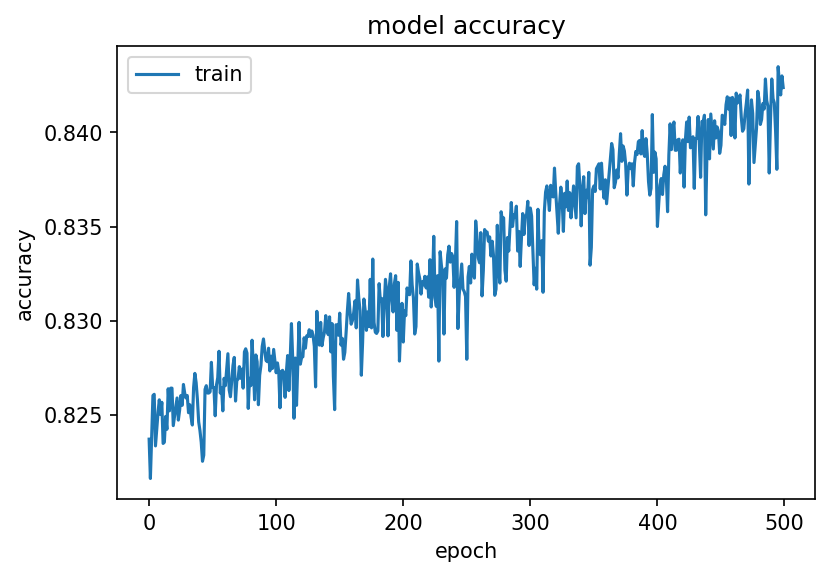

In [147]:
plt.figure(dpi=150)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')
plt.show

Learning and k-fold for checking if there's no overfitting

In [148]:
def model_fit():
    classifier = Sequential()
    classifier.add(Dense(activation= 'relu', input_dim = 114, units = 128, init = 'uniform'))
    classifier.add(Dense(activation= 'relu', units = 64, init = 'uniform'))
    classifier.add(Dense(activation= 'relu', units = 32, init = 'uniform'))
    classifier.add(Dense(activation= 'relu', units = 16, init = 'uniform'))
    classifier.add(Dense(activation= 'softmax', units = 4, init = 'uniform'))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return classifier

In [149]:
from sklearn.model_selection import KFold

n_split =5

for train_index,test_index in KFold(n_split).split(X_trial):
    x_train,x_test=X_trial.iloc[train_index],X_trial.iloc[test_index]
    y_train,y_test=y_trial.iloc[train_index],y_trial.iloc[test_index]
    split_model=model_fit()
    split_model.fit(x_train, y_train,epochs=400,batch_size = 2024)
    print('Model evaluation ',split_model.evaluate(x_test,y_test))

/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=114, units=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  """
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
/home/jaeheuk/anaconda3/lib/python3.7/site-pa

Epoch 1/400
27244/27244 [==============================] - 0s 8us/step - loss: 1.3796 - accuracy: 0.3308
Epoch 2/400
27244/27244 [==============================] - 0s 3us/step - loss: 1.3376 - accuracy: 0.3332
Epoch 3/400
27244/27244 [==============================] - 0s 3us/step - loss: 1.1221 - accuracy: 0.4071
Epoch 4/400
27244/27244 [==============================] - 0s 3us/step - loss: 0.9989 - accuracy: 0.5589
Epoch 5/400
27244/27244 [==============================] - 0s 3us/step - loss: 0.9729 - accuracy: 0.5589
Epoch 6/400
27244/27244 [==============================] - 0s 3us/step - loss: 0.9587 - accuracy: 0.5589
Epoch 7/400
27244/27244 [==============================] - 0s 3us/step - loss: 0.9479 - accuracy: 0.5589
Epoch 8/400
27244/27244 [==============================] - 0s 3us/step - loss: 0.9346 - accuracy: 0.5589
Epoch 9/400
27244/27244 [==============================] - 0s 3us/step - loss: 0.9197 - accuracy: 0.5589
Epoch 10/400
27244/27244 [=============================

/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=114, units=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  """
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
/home/jaeheuk/anaconda3/lib/python3.7/site-pa

Epoch 1/400
27245/27245 [==============================] - 0s 8us/step - loss: 1.3804 - accuracy: 0.3263
Epoch 2/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.3544 - accuracy: 0.3336
Epoch 3/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.2206 - accuracy: 0.3336
Epoch 4/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.0222 - accuracy: 0.5393
Epoch 5/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9863 - accuracy: 0.5556
Epoch 6/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9717 - accuracy: 0.5556
Epoch 7/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9608 - accuracy: 0.5556
Epoch 8/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9484 - accuracy: 0.5556
Epoch 9/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9341 - accuracy: 0.5556
Epoch 10/400
27245/27245 [=============================

/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=114, units=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  """
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
/home/jaeheuk/anaconda3/lib/python3.7/site-pa

Epoch 1/400
27245/27245 [==============================] - 0s 9us/step - loss: 1.3804 - accuracy: 0.5133
Epoch 2/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.3512 - accuracy: 0.5496
Epoch 3/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.1810 - accuracy: 0.5496
Epoch 4/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.0126 - accuracy: 0.5496
Epoch 5/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9870 - accuracy: 0.5496
Epoch 6/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9735 - accuracy: 0.5496
Epoch 7/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9629 - accuracy: 0.5496
Epoch 8/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9504 - accuracy: 0.5496
Epoch 9/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9356 - accuracy: 0.5497
Epoch 10/400
27245/27245 [=============================

/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=114, units=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  """
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
/home/jaeheuk/anaconda3/lib/python3.7/site-pa

Epoch 1/400
27245/27245 [==============================] - 0s 9us/step - loss: 1.3801 - accuracy: 0.5346
Epoch 2/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.3499 - accuracy: 0.5458
Epoch 3/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.1863 - accuracy: 0.5458
Epoch 4/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.0242 - accuracy: 0.5458
Epoch 5/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9965 - accuracy: 0.5458
Epoch 6/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9848 - accuracy: 0.5458
Epoch 7/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9743 - accuracy: 0.5458
Epoch 8/400
27245/27245 [==============================] - 0s 4us/step - loss: 0.9618 - accuracy: 0.5458
Epoch 9/400
27245/27245 [==============================] - 0s 4us/step - loss: 0.9465 - accuracy: 0.5458
Epoch 10/400
27245/27245 [=============================

/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=114, units=128, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  """
/home/jaeheuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
/home/jaeheuk/anaconda3/lib/python3.7/site-pa

Epoch 1/400
27245/27245 [==============================] - 0s 10us/step - loss: 1.3795 - accuracy: 0.5498
Epoch 2/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.3306 - accuracy: 0.5500
Epoch 3/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.0998 - accuracy: 0.5500
Epoch 4/400
27245/27245 [==============================] - 0s 3us/step - loss: 1.0142 - accuracy: 0.5500
Epoch 5/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9832 - accuracy: 0.5500
Epoch 6/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9689 - accuracy: 0.5500
Epoch 7/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9561 - accuracy: 0.5500
Epoch 8/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9417 - accuracy: 0.5500
Epoch 9/400
27245/27245 [==============================] - 0s 3us/step - loss: 0.9267 - accuracy: 0.5508
Epoch 10/400
27245/27245 [============================

In [375]:
import numpy as np
for i in range(0,50):
    predictions = classifier.predict(X_test)
    print('Prediction:', to_string(i))

Prediction: 9~12 semesters
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: 9~12 semesters
Prediction: Never graduate
Prediction: normal
Prediction: normal
Prediction: 9~12 semesters
Prediction: normal
Prediction: Never graduate
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: 9~12 semesters
Prediction: normal
Prediction: 9~12 semesters
Prediction: 9~12 semesters
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: 9~12 semesters
Prediction: 9~12 semesters
Prediction: Never graduate
Prediction: 9~12 semesters
Prediction: 9~12 semesters
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: 9~12 semesters
Prediction: 9~12 semesters
Prediction: 9~12 semesters
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: normal
Prediction: 9~12 

In [373]:
def to_string(i):
    if np.argmax(predictions[i])==3:
        return 'normal'
    if np.argmax(predictions[i])==2:
        return '9~12 semesters'
    if np.argmax(predictions[i])==1:
        return '13+ semesters'
    if np.argmax(predictions[i])==0:
        return 'Never graduate'
   

Multi-label and normal confusion matrix, classification report for verification and checking performance.

In [131]:
from sklearn.metrics import multilabel_confusion_matrix
import sklearn.metrics as skm
predictions = classifier.predict(x_test)
y_pred = predictions>.5
y_pred = y_pred.astype(int)
multilabel_confusion_matrix(y_pred, y_test)

array([[[6171,  138],
        [  46,  456]],

       [[6631,   84],
        [  28,   68]],

       [[4132,  469],
        [ 428, 1782]],

       [[2511,  351],
        [ 486, 3463]]])

In [133]:
y_test_values = y_test.values

In [134]:
y_test_values

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0]], dtype=uint8)

In [135]:
import numpy as np

In [136]:
y_true = np.array(y_test)
y_pred = np.array(y_pred)

In [137]:
matrix = skm.confusion_matrix(y_true.argmax(axis =1), y_pred.argmax(axis=1), labels = [0,1,2,3])

In [138]:
print(matrix)

[[ 476    1   52   65]
 [   4   68   79    1]
 [  22   27 1782  420]
 [  54    0  297 3463]]


In [139]:
pd.DataFrame(matrix, index=['Non graduates', '+12', '9~12', 'Normal'], columns=['Non graduates', '+12', '9~12', 'Normal'])

,Non graduates,+12,9~12,Normal
Non graduates,476,1,52,65
+12,4,68,79,1
9~12,22,27,1782,420
Normal,54,0,297,3463


In [141]:
print(skm.classification_report(y_true.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       594
           1       0.71      0.45      0.55       152
           2       0.81      0.79      0.80      2251
           3       0.88      0.91      0.89      3814

    accuracy                           0.85      6811
   macro avg       0.81      0.74      0.77      6811
weighted avg       0.85      0.85      0.85      6811

